In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import IPython
import time
from torch.utils.data import Dataset
import random
import torch
import torchaudio
from torch.utils.data import DataLoader
from randomDataset import RandomDataset
import sys
sys.path.append("..")
from utils.cnn import CNNNetwork
from utils.lstm import LSTMNetwork
from utils.codec import CodecTransform
from utils.augmentation import AudioAugmentation
from encodec import EncodecModel

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
sr = 16000
aug = AudioAugmentation(sample_rate=sr)

src = 'speeches'
codec = CodecTransform(sr, bandwidth=12.0)
none = lambda x: x
dataset = RandomDataset(src, 16000, 10000, none, 6, 5)

augmentations = [
    ("volume_adjustment", {'factor': 1.2}),
    ("volume_adjustment", {'factor': 0.9}),
    ("volume_adjustment", {'factor': 1.4}),
    ("volume_adjustment", {'factor': 0.75}),
    ("highpass_filter", {'cutoff_freq': 100}),
    ("highpass_filter", {'cutoff_freq': 200}),
    ("lowpass_filter", {'cutoff_freq': 3000}),
    ("lowpass_filter", {'cutoff_freq': 6000})

]


cuda


In [ ]:
first, speaker = dataset[0]
x = codec(first)
y = [speaker]

for i in range(40000):
    if i % 1000 == 0:
        print(i)
    wav, speaker = dataset[i]
    a1, a2 = random.sample(augmentations, 2)
    wav1 = aug.apply(wav, a1)
    wav2 = aug.apply(wav, a2)
    
    codec0 = codec(wav)
    codec1 = codec(wav1)
    codec2 = codec(wav2)
    x = torch.cat((x, codec0, codec1, codec2), dim=0)
    y.extend([speaker, speaker, speaker])
    

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000


In [ ]:
x = x.cpu().numpy()
y = np.array(y)

In [ ]:
with open('trainX.npy', 'rb') as f:
    np.load(f, x)
    
with open('trainY.npy', 'wb') as f:
    np.save(f, y)

In [3]:
trainX = np.load('trainX.npy')

In [4]:
trainY = np.load("trainY.npy")

In [6]:
i = 29109
codes = torch.tensor(trainX[i, :, :])
speaker = dataset.speeches[trainY[i]]
codec.cpu()
reconstruction = codec.decode(codes)
IPython.display.Audio(reconstruction, rate = codec.model.sample_rate)


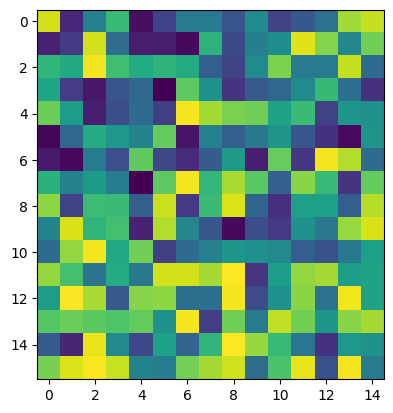

In [10]:
plt.imshow(trainX[-1, :, 0:15])

In [86]:
i = 30000
codes.type(torch.int64).dtype

torch.int64